In [1]:
import ComputationalHypergraphDiscovery as CHD

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [2]:
import jax.numpy as np
from jax import random
import joblib

In [3]:
def random_noise(noise_scale, noise_subkey, shape):
  return noise_scale * random.normal(noise_subkey, shape)

def uniform_noise(noise_scale, noise_subkey, shape):
  return random.uniform(noise_subkey, shape, minval=-noise_scale, maxval=noise_scale)

def generate_noise(noise_scale, noise_subkey, shape):
  return uniform_noise(noise_scale, noise_subkey, shape)

# Example 1

$$\begin{matrix}x_1=w_1\\x_2=w_2 \end{matrix} $$

In [4]:
key = random.PRNGKey(0)
key, subkey = random.split(key)

# How many samples do we generate for training?
n_train = 2000

W = random.normal(subkey, (n_train, 4))

# Generate some small noise
noise_scale = 0.01
key, noise_subkey = random.split(key)

X=np.concatenate([W[:,:2] + generate_noise(noise_scale, noise_subkey, (n_train, 2)),W],axis=1)
node_names1=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$']    
kernels=[CHD.Modes.LinearMode(), CHD.Modes.QuadraticMode(), CHD.Modes.GaussianMode(l=0.5)]


In [5]:
graph_discovery1=CHD.GraphDiscovery(X,node_names1,kernels)

Finding ancestors with kernel [linear]: 100%|██████████| 4/4 [00:13<00:00,  3.33s/it]



Results for $x_1$
Kernel [linear] has n/(n+s)=0.011436126078499642, Z=(1.00, 1.00), gamma=2.30e+01
Kernel [quadratic] has n/(n+s)=0.011461061550155716, Z=(1.00, 1.00), gamma=2.28e+01
Kernel [gaussian] has n/(n+s)=0.018414871067469245, Z=(0.82, 0.84), gamma=8.89e+00
$x_1$ has ancestors with the kernel [linear] | (n/(s+n)=0.01 after pruning)


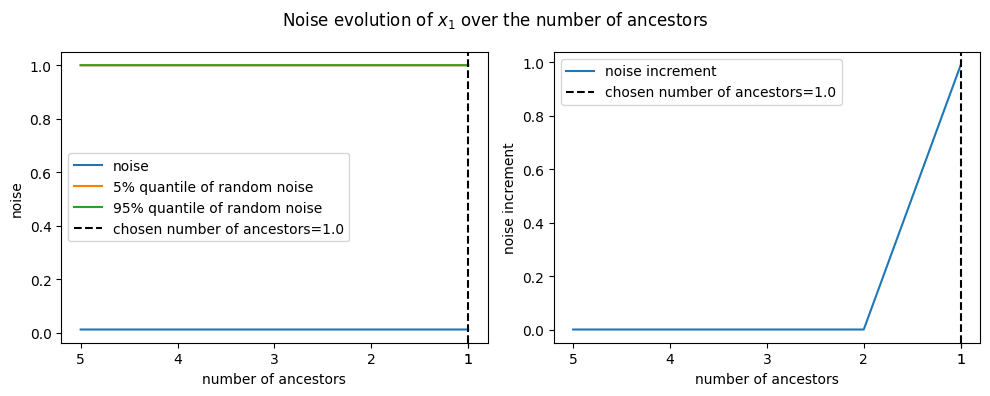

Ancestors of $x_1$: ['$w_1$']


Results for $x_2$
Kernel [linear] has n/(n+s)=0.011394818865649598, Z=(1.00, 1.00), gamma=2.29e+01
Kernel [quadratic] has n/(n+s)=0.01144791481540641, Z=(1.00, 1.00), gamma=2.27e+01
Kernel [gaussian] has n/(n+s)=0.017952166872126734, Z=(0.82, 0.84), gamma=9.15e+00
$x_2$ has ancestors with the kernel [linear] | (n/(s+n)=0.01 after pruning)


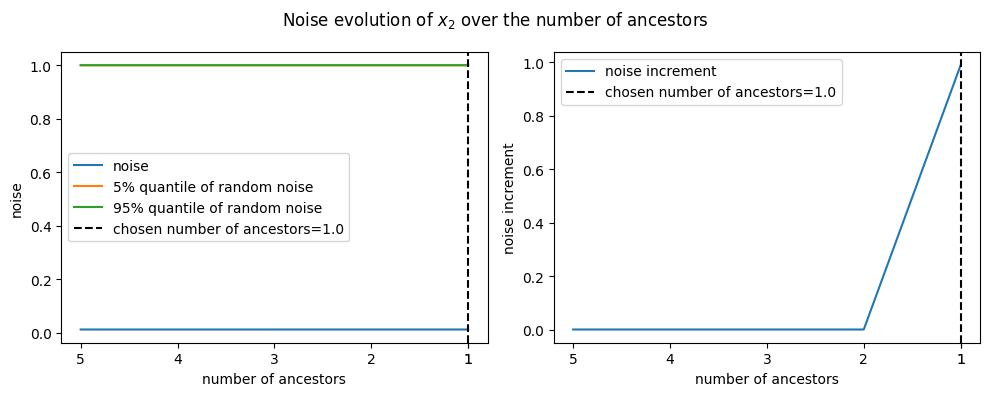

Ancestors of $x_2$: ['$w_2$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.01143621561994228, Z=(1.00, 1.00), gamma=2.30e+01
Kernel [quadratic] has n/(n+s)=0.0114611298841488, Z=(1.00, 1.00), gamma=2.28e+01
Kernel [gaussian] has n/(n+s)=0.01845962127643891, Z=(0.82, 0.84), gamma=8.82e+00
$w_1$ has ancestors with the kernel [linear] | (n/(s+n)=0.01 after pruning)


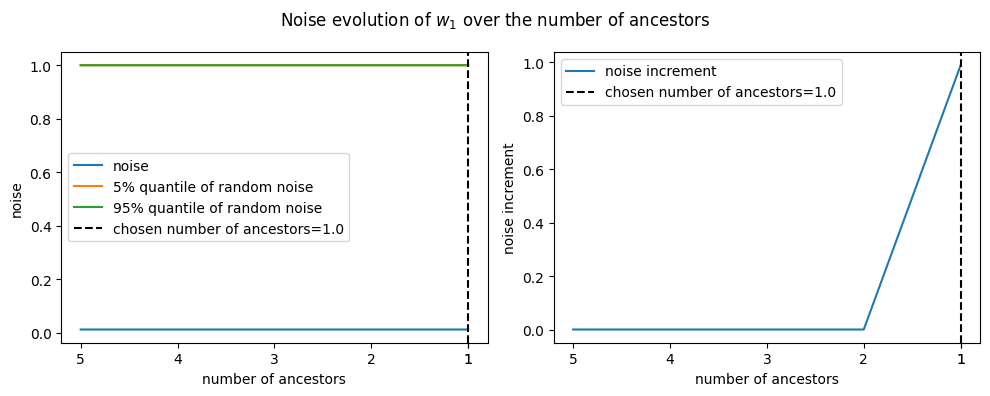

Ancestors of $w_1$: ['$x_1$']


Results for $w_2$
Kernel [linear] has n/(n+s)=0.011394830658514675, Z=(1.00, 1.00), gamma=2.29e+01
Kernel [quadratic] has n/(n+s)=0.011447999026186201, Z=(1.00, 1.00), gamma=2.27e+01
Kernel [gaussian] has n/(n+s)=0.017987179289296395, Z=(0.82, 0.84), gamma=9.35e+00
$w_2$ has ancestors with the kernel [linear] | (n/(s+n)=0.01 after pruning)


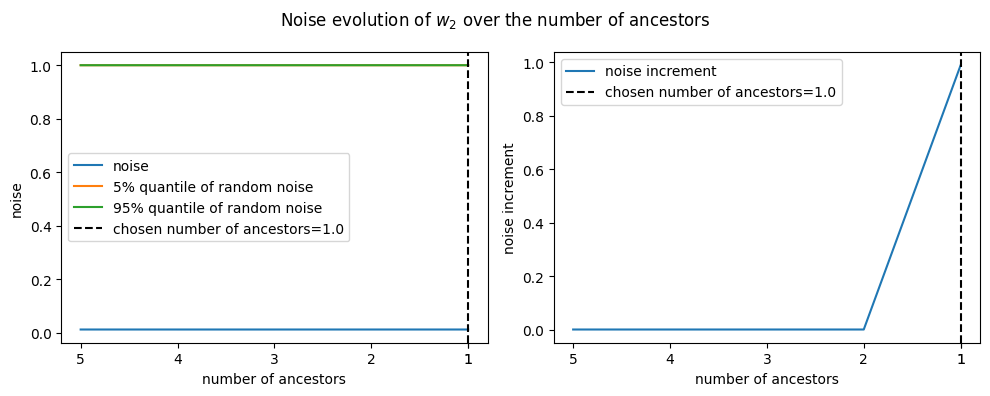

Ancestors of $w_2$: ['$x_2$']


Results for $w_3$
Kernel [linear] has n/(n+s)=0.9994682226958312, Z=(1.00, 1.00), gamma=6.82e+03
Kernel [quadratic] has n/(n+s)=0.9987756431695745, Z=(1.00, 1.00), gamma=8.23e+03
Kernel [gaussian] has n/(n+s)=0.8690094917835333, Z=(0.86, 0.88), gamma=6.72e-02
$w_3$ has no ancestors


Results for $w_4$
Kernel [linear] has n/(n+s)=0.9995312919221788, Z=(1.00, 1.00), gamma=6.58e-02
Kernel [quadratic] has n/(n+s)=0.9990771964303503, Z=(1.00, 1.00), gamma=1.21e+04
Kernel [gaussian] has n/(n+s)=0.8684355080807866, Z=(0.86, 0.88), gamma=6.83e-02
$w_4$ has no ancestors



In [6]:
graph_discovery1.fit()

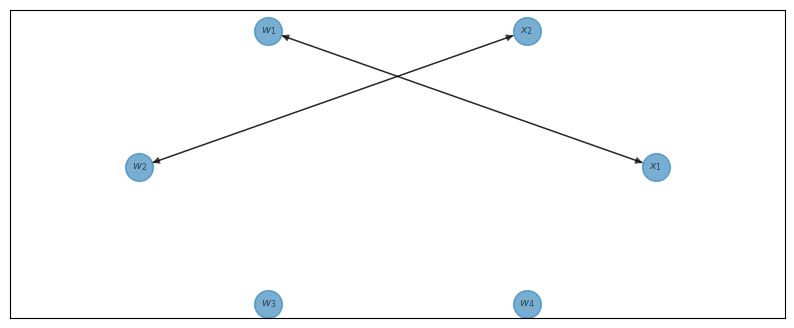

In [7]:
graph_discovery1.plot_graph(type_label=False)

In [8]:
graph_discovery1.show_functional_dependencies()

x_1
 = 1.0 * w_1 {kernel=linear, gamma=23, noise=0.0114}
x_2
 = 1.0 * w_2 {kernel=linear, gamma=22.9, noise=0.0114}
w_1
 = 1.0 * x_1 {kernel=linear, gamma=23, noise=0.0114}
w_2
 = 1.0 * x_2 {kernel=linear, gamma=22.9, noise=0.0114}


In [9]:
joblib.dump(graph_discovery1, "example1.pkl")

['example1.pkl']

# Example 2

$$\begin{matrix}x_1&=&w_1\\x_2&=&x_1^2+1+0.1w_2\\x_3&=&w_3 \end{matrix} $$

In [10]:

key, subkey = random.split(key)

W = random.normal(subkey, (n_train, 4))

# Generate some small noise
noise_scale = 0.01
key, noise_subkey = random.split(key)
X1=W[:,0] + generate_noise(noise_scale, noise_subkey, (n_train,))

key, noise_subkey = random.split(key)
X2=X1**2+1+0.1*(W[:,1] + generate_noise(noise_scale, noise_subkey, (n_train,)))

key, noise_subkey = random.split(key)
X3=W[:,2] + generate_noise(noise_scale, noise_subkey, (n_train,))

X=np.concatenate([np.stack([X1, X2, X3], axis=1), W], axis=1)
node_names2=['$x_1$','$x_2$','$x_3$','$w_1$','$w_2$','$w_3$','$w_4$']

In [11]:
graph_discovery2=CHD.GraphDiscovery(X,node_names2,kernels)

Finding ancestors with kernel [linear]: 100%|██████████| 5/5 [00:13<00:00,  2.72s/it]



Results for $x_1$
Kernel [linear] has n/(n+s)=0.011481632363109655, Z=(1.00, 1.00), gamma=2.30e+01
Kernel [quadratic] has n/(n+s)=0.015052409482213947, Z=(1.00, 1.00), gamma=1.74e+01
Kernel [gaussian] has n/(n+s)=0.01917145711495848, Z=(0.73, 0.76), gamma=7.05e+00
$x_1$ has ancestors with the kernel [linear] | (n/(s+n)=0.01 after pruning)


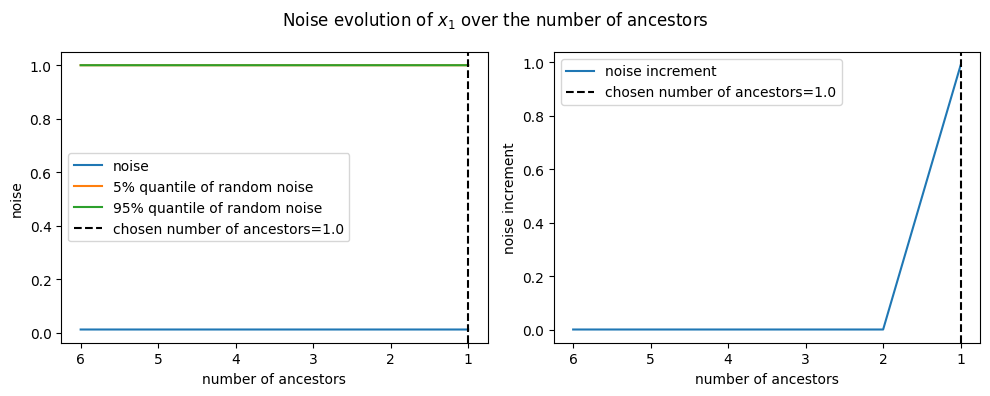

Ancestors of $x_1$: ['$w_1$']


Results for $x_3$
Kernel [linear] has n/(n+s)=0.011450292406367055, Z=(1.00, 1.00), gamma=2.30e+01
Kernel [quadratic] has n/(n+s)=0.011487068013561379, Z=(1.00, 1.00), gamma=2.28e+01
Kernel [gaussian] has n/(n+s)=0.016340414721781958, Z=(0.75, 0.77), gamma=6.99e+00
$x_3$ has ancestors with the kernel [linear] | (n/(s+n)=0.01 after pruning)


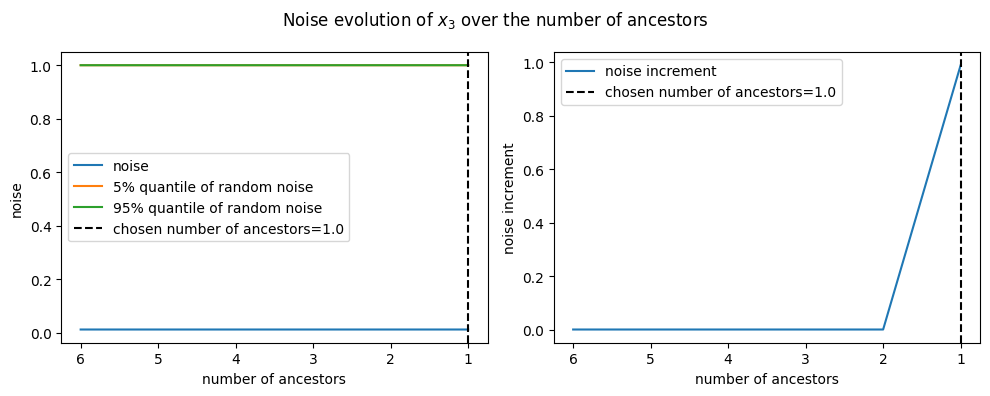

Ancestors of $x_3$: ['$w_3$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.01148164660450777, Z=(1.00, 1.00), gamma=2.30e+01
Kernel [quadratic] has n/(n+s)=0.015053256821502626, Z=(1.00, 1.00), gamma=1.74e+01
Kernel [gaussian] has n/(n+s)=0.0207084764100315, Z=(0.73, 0.76), gamma=7.05e+00
$w_1$ has ancestors with the kernel [linear] | (n/(s+n)=0.01 after pruning)


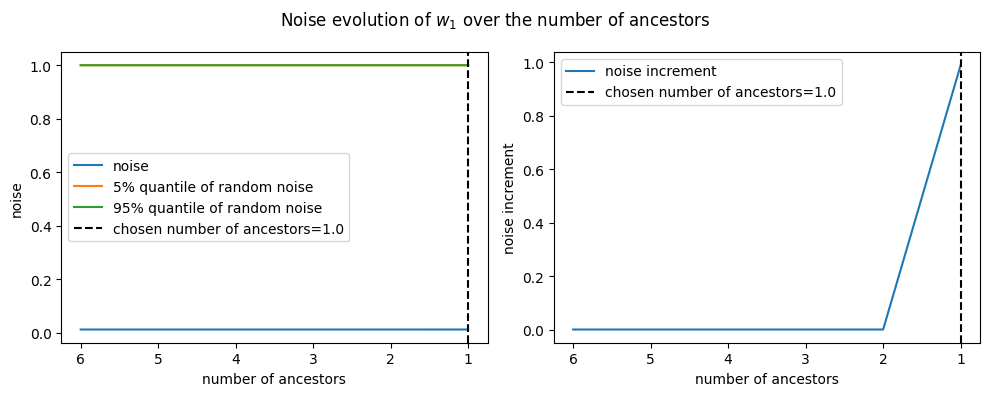

Ancestors of $w_1$: ['$x_1$']


Results for $w_3$
Kernel [linear] has n/(n+s)=0.011450453185233377, Z=(1.00, 1.00), gamma=2.30e+01
Kernel [quadratic] has n/(n+s)=0.01148783879963802, Z=(1.00, 1.00), gamma=2.28e+01
Kernel [gaussian] has n/(n+s)=0.016026639318466866, Z=(0.74, 0.77), gamma=6.95e+00
$w_3$ has ancestors with the kernel [linear] | (n/(s+n)=0.01 after pruning)


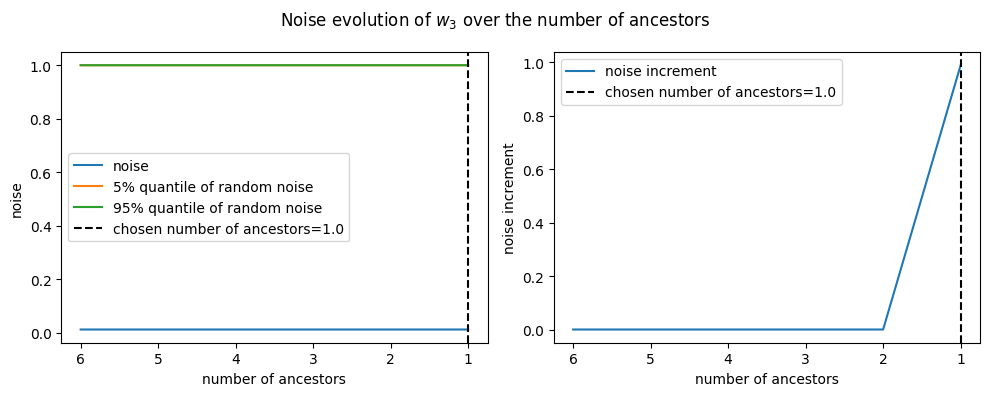

Ancestors of $w_3$: ['$x_3$']



Finding ancestors with kernel [quadratic]: 100%|██████████| 5/5 [00:04<00:00,  1.12it/s]



Results for $w_2$
Kernel [linear] has n/(n+s)=0.9989923950134975, Z=(1.00, 1.00), gamma=4.49e+03
Kernel [quadratic] has n/(n+s)=0.03401122650552922, Z=(1.00, 1.00), gamma=1.48e-02
Kernel [gaussian] has n/(n+s)=0.10984448067536157, Z=(0.83, 0.84), gamma=6.59e-01
$w_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.01 after pruning)


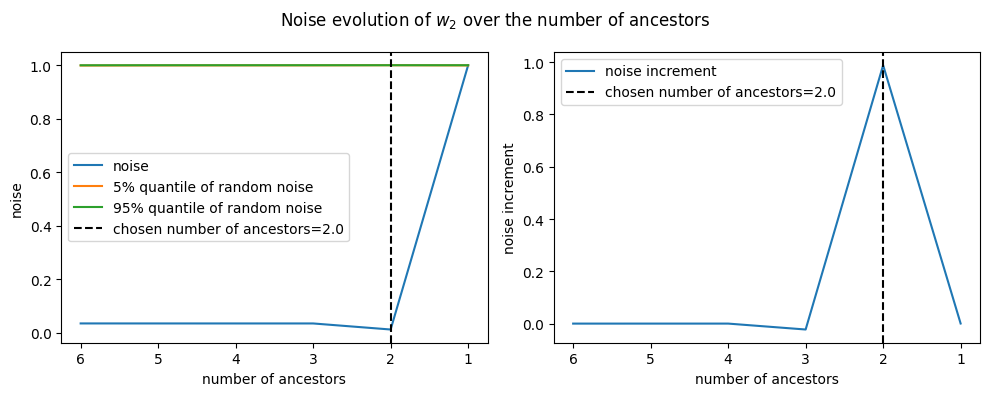

Ancestors of $w_2$: ['$x_1$', '$x_2$']



Finding ancestors with kernel [gaussian]: 100%|██████████| 5/5 [00:09<00:00,  1.94s/it]


Results for $x_2$
Kernel [linear] has n/(n+s)=0.9982240296588095, Z=(1.00, 1.00), gamma=5.73e+03
Kernel [quadratic] has n/(n+s)=0.016841959092256376, Z=(1.00, 1.00), gamma=6.07e+00
Kernel [gaussian] has n/(n+s)=0.014551480975315213, Z=(0.73, 0.75), gamma=6.59e+00
$x_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.17 after pruning)


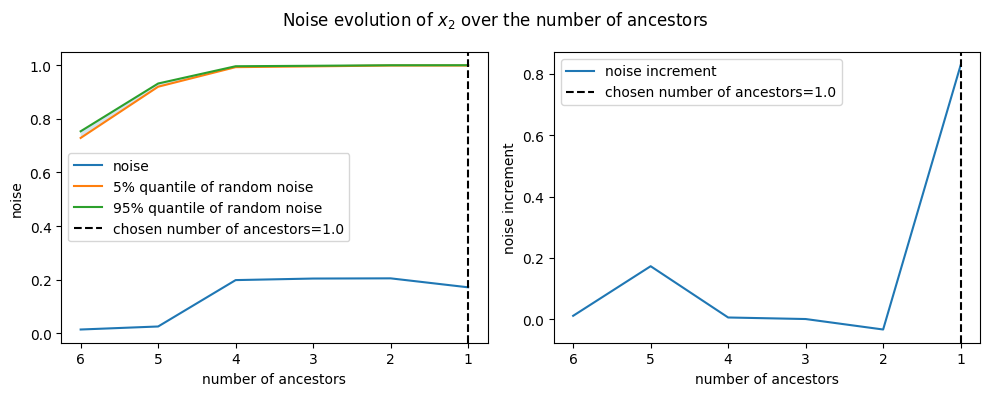

Ancestors of $x_2$: ['$x_1$']


Results for $w_4$
Kernel [linear] has n/(n+s)=0.9997941509588251, Z=(1.00, 1.00), gamma=4.25e+03
Kernel [quadratic] has n/(n+s)=0.9980613047602463, Z=(1.00, 1.00), gamma=7.62e+03
Kernel [gaussian] has n/(n+s)=0.865388528186897, Z=(0.86, 0.88), gamma=3.64e-01
$w_4$ has no ancestors



In [12]:
graph_discovery2.fit()

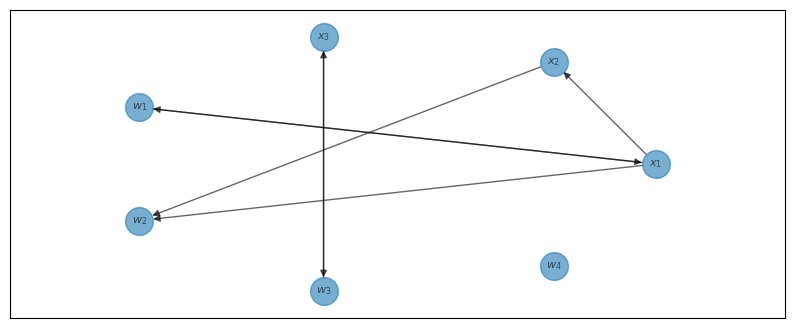

In [13]:
graph_discovery2.plot_graph(type_label=False)

In [14]:
graph_discovery2.show_functional_dependencies()

x_1
 = 1.0 * w_1 {kernel=linear, gamma=23.1, noise=0.0115}
x_2
 = 1.0 * x_1 {kernel=gaussian, gamma=165, noise=0.172}
x_3
 = 1.0 * w_3 {kernel=linear, gamma=23.1, noise=0.0115}
w_1
 = 1.0 * x_1 {kernel=linear, gamma=23.1, noise=0.0115}
w_2
 = 1.0 * x_1 {kernel=quadratic, gamma=0.0381, noise=0.0113}
 + 1.0 * x_2 {kernel=quadratic, gamma=0.0381, noise=0.0113}
w_3
 = 1.0 * x_3 {kernel=linear, gamma=23.1, noise=0.0115}


In [15]:
joblib.dump(graph_discovery2, "example2.pkl")

['example2.pkl']

# Example 3

$$\begin{matrix}x_1&=&w_1w_2\\x_2&=&w_2\sin(w_4)\end{matrix} $$

In [16]:
key, subkey = random.split(key)

W = random.normal(subkey, (n_train, 4))

# Generate some small noise
noise_scale = 0.01
key, noise_subkey = random.split(key)
W1=W[:,0] + generate_noise(noise_scale, noise_subkey, (n_train,))

key, noise_subkey = random.split(key)
W2=W[:,1] + generate_noise(noise_scale, noise_subkey, (n_train,))

X1=W1*W2

key, noise_subkey = random.split(key)
X2=W2*np.sin(W[:,3] + generate_noise(noise_scale, noise_subkey, (n_train,)))

X=np.concatenate([np.stack([X1,X2],axis=1),W],axis=1)
node_names3=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$'] 
  

In [17]:
graph_discovery3=CHD.GraphDiscovery(X,node_names3,kernels)

Finding ancestors with kernel [quadratic]: 100%|██████████| 4/4 [00:04<00:00,  1.17s/it]



Results for $w_4$
Kernel [linear] has n/(n+s)=0.9993579162210979, Z=(1.00, 1.00), gamma=3.97e+03
Kernel [quadratic] has n/(n+s)=0.9111506305292879, Z=(1.00, 1.00), gamma=9.79e+03
Kernel [gaussian] has n/(n+s)=0.8071072367427229, Z=(0.79, 0.81), gamma=1.57e+00
$w_4$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.91 after pruning)


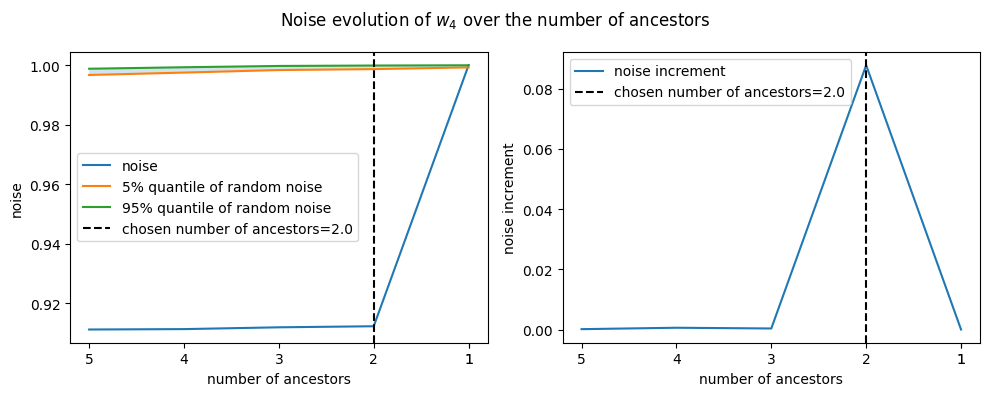

Ancestors of $w_4$: ['$x_2$', '$w_2$']



Finding ancestors with kernel [gaussian]: 100%|██████████| 4/4 [00:19<00:00,  4.97s/it]


Results for $x_1$
Kernel [linear] has n/(n+s)=0.999109736999843, Z=(1.00, 1.00), gamma=3.84e+03
Kernel [quadratic] has n/(n+s)=0.01633598248668885, Z=(1.00, 1.00), gamma=3.26e+01
Kernel [gaussian] has n/(n+s)=0.014428784082015577, Z=(0.83, 0.85), gamma=1.53e+01
$x_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.02 after pruning)


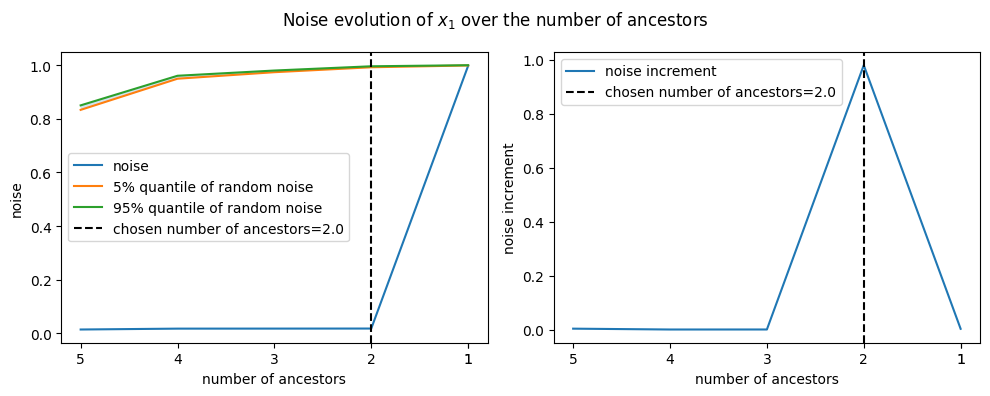

Ancestors of $x_1$: ['$w_1$', '$w_2$']


Results for $x_2$
Kernel [linear] has n/(n+s)=0.9989836113366198, Z=(1.00, 1.00), gamma=3.91e+03
Kernel [quadratic] has n/(n+s)=0.5403180756668, Z=(1.00, 1.00), gamma=1.51e+03
Kernel [gaussian] has n/(n+s)=0.10212682472802113, Z=(0.75, 0.77), gamma=2.55e+00
$x_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.12 after pruning)


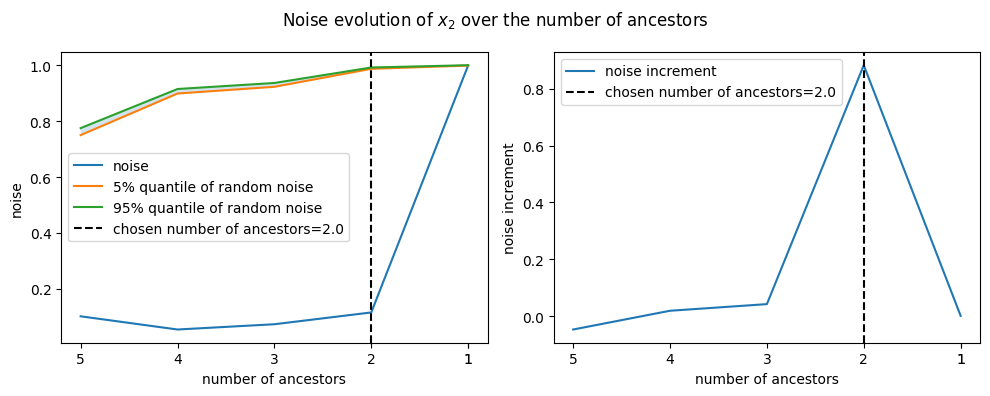

Ancestors of $x_2$: ['$w_2$', '$w_4$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.9990865129608391, Z=(1.00, 1.00), gamma=3.87e+03
Kernel [quadratic] has n/(n+s)=0.9024556008947012, Z=(1.00, 1.00), gamma=9.69e+03
Kernel [gaussian] has n/(n+s)=0.6581903637523682, Z=(0.88, 0.89), gamma=2.51e+01
$w_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.73 after pruning)


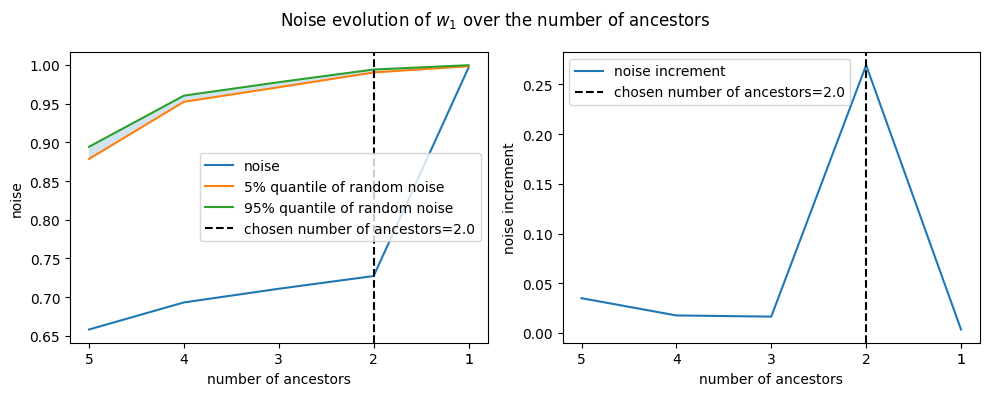

Ancestors of $w_1$: ['$x_1$', '$w_2$']


Results for $w_2$
Kernel [linear] has n/(n+s)=0.9996125213906529, Z=(1.00, 1.00), gamma=3.82e+03
Kernel [quadratic] has n/(n+s)=0.7786513633690448, Z=(1.00, 1.00), gamma=6.95e+03
Kernel [gaussian] has n/(n+s)=0.4760536435269296, Z=(0.80, 0.82), gamma=7.09e+00
$w_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.74 after pruning)


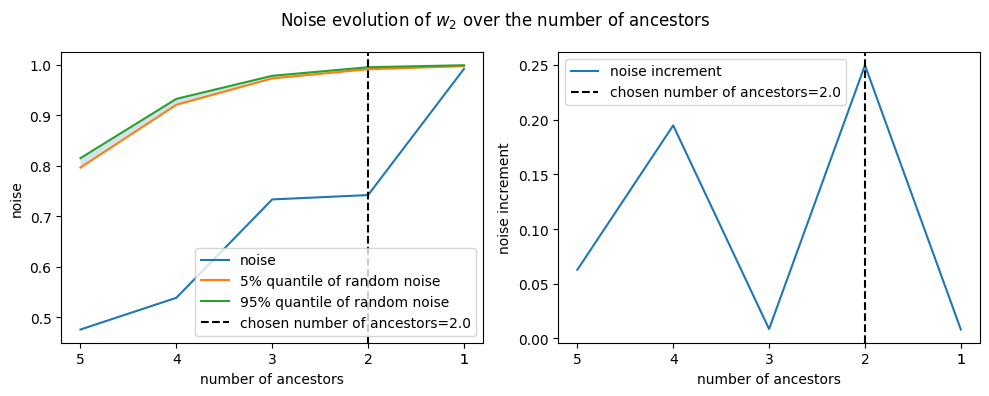

Ancestors of $w_2$: ['$x_1$', '$w_1$']


Results for $w_3$
Kernel [linear] has n/(n+s)=0.9998174608972915, Z=(1.00, 1.00), gamma=4.05e+03
Kernel [quadratic] has n/(n+s)=0.9977523093021687, Z=(1.00, 1.00), gamma=4.84e+03
Kernel [gaussian] has n/(n+s)=0.8760229684871171, Z=(0.86, 0.88), gamma=2.10e-01
$w_3$ has no ancestors



In [18]:
graph_discovery3.fit()

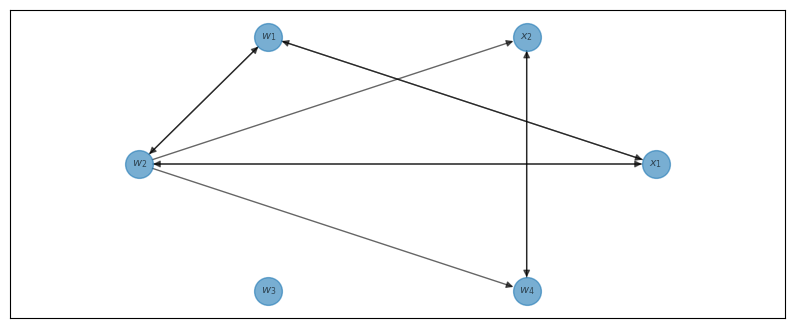

In [19]:
graph_discovery3.plot_graph(type_label=False)

In [20]:
graph_discovery3.show_functional_dependencies()

x_1
 = 1.0 * w_1 {kernel=gaussian, gamma=32.2, noise=0.018}
 + 1.0 * w_2 {kernel=gaussian, gamma=32.2, noise=0.018}
x_2
 = 1.0 * w_2 {kernel=gaussian, gamma=0.0689, noise=0.116}
 + 1.0 * w_4 {kernel=gaussian, gamma=0.0689, noise=0.116}
w_1
 = 1.0 * x_1 {kernel=gaussian, gamma=12.5, noise=0.727}
 + 1.0 * w_2 {kernel=gaussian, gamma=12.5, noise=0.727}
w_2
 = 1.0 * x_1 {kernel=gaussian, gamma=17.5, noise=0.742}
 + 1.0 * w_1 {kernel=gaussian, gamma=17.5, noise=0.742}
w_4
 = 1.0 * x_2 {kernel=quadratic, gamma=9.93e+03, noise=0.912}
 + 1.0 * w_2 {kernel=quadratic, gamma=9.93e+03, noise=0.912}


In [21]:
joblib.dump(graph_discovery3, "example3.pkl")

['example3.pkl']

# Example 4

$$\begin{matrix}x_1&=&w_1\\x_2&=&x_1^3+1+0.1w_2\\x_3&=&(x_1+2)^3+0.1w_3\end{matrix} $$

In [22]:
key, subkey = random.split(key)

W = random.normal(subkey, (n_train, 4))

# Generate some small noise
noise_scale = 0.01
key, noise_subkey = random.split(key)
W1=W[:,0] + generate_noise(noise_scale, noise_subkey, (n_train,))

key, noise_subkey = random.split(key)
X2=X1**3+1+0.1*(W[:,1] + generate_noise(noise_scale, noise_subkey, (n_train,)))

key, noise_subkey = random.split(key)
X3=(X1+2)**3+0.1*(W[:,2] + generate_noise(noise_scale, noise_subkey, (n_train,)))

X=np.concatenate([np.stack([X1,X2,X3],axis=1),W],axis=1)
node_names4=['$x_1$','$x_2$','$x_3$','$w_1$','$w_2$','$w_3$','$w_4$']  

In [23]:
graph_discovery4=CHD.GraphDiscovery(X,node_names4,kernels)

Finding ancestors with kernel [quadratic]: 100%|██████████| 5/5 [00:10<00:00,  2.20s/it]



Results for $x_2$
Kernel [linear] has n/(n+s)=0.52327584188102, Z=(1.00, 1.00), gamma=1.11e+03
Kernel [quadratic] has n/(n+s)=0.0005028862072225366, Z=(1.00, 1.00), gamma=3.29e-03
Kernel [gaussian] has n/(n+s)=0.07718250379127863, Z=(0.68, 0.70), gamma=1.18e+01
$x_2$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.52 after pruning)


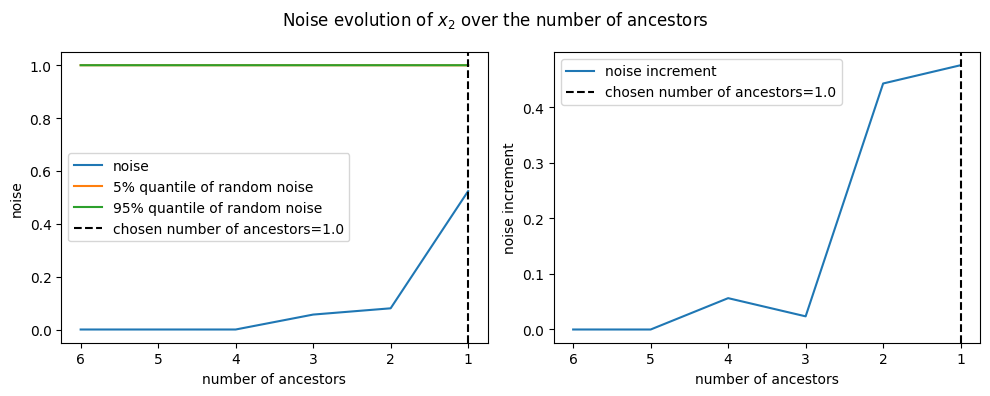

Ancestors of $x_2$: ['$x_3$']


Results for $x_3$
Kernel [linear] has n/(n+s)=0.4659085430865025, Z=(1.00, 1.00), gamma=1.43e+03
Kernel [quadratic] has n/(n+s)=0.00018191162593691527, Z=(1.00, 1.00), gamma=2.50e-02
Kernel [gaussian] has n/(n+s)=0.02219688189552135, Z=(0.68, 0.70), gamma=1.14e+01
$x_3$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.02 after pruning)


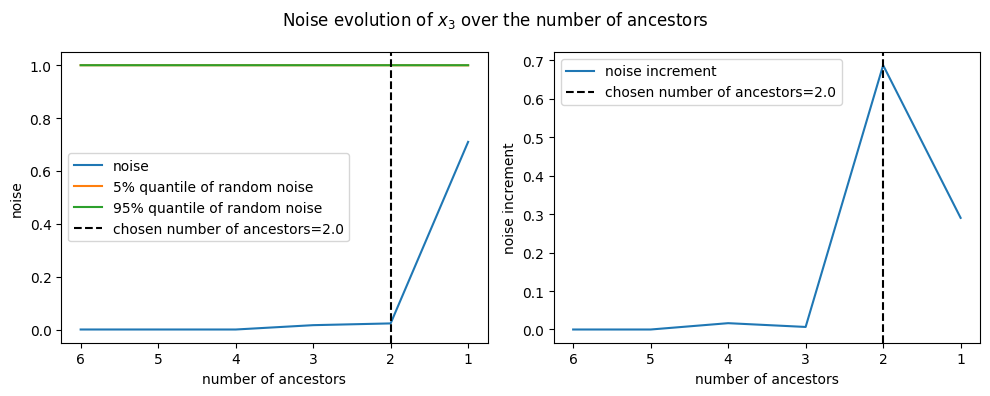

Ancestors of $x_3$: ['$x_1$', '$x_2$']


Results for $w_3$
Kernel [linear] has n/(n+s)=0.9997383411860041, Z=(1.00, 1.00), gamma=4.40e+03
Kernel [quadratic] has n/(n+s)=0.02450314375703037, Z=(1.00, 1.00), gamma=5.45e-05
Kernel [gaussian] has n/(n+s)=0.7727072958292902, Z=(0.79, 0.81), gamma=2.37e+00
$w_3$ has ancestors with the kernel [quadratic] | (n/(s+n)=0.02 after pruning)


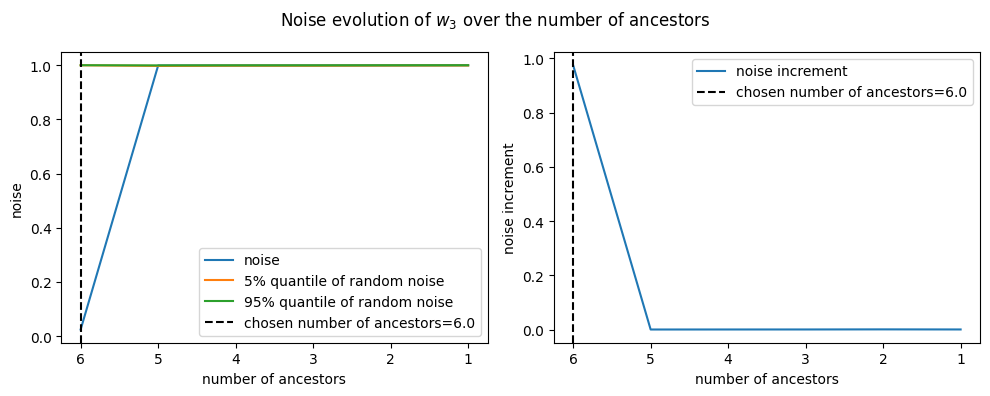

Ancestors of $w_3$: ['$x_1$', '$x_2$', '$x_3$', '$w_1$', '$w_2$', '$w_4$']



Finding ancestors with kernel [gaussian]: 100%|██████████| 5/5 [00:14<00:00,  2.99s/it]



Results for $x_1$
Kernel [linear] has n/(n+s)=0.9029072754852866, Z=(1.00, 1.00), gamma=5.70e+03
Kernel [quadratic] has n/(n+s)=0.6155107023698353, Z=(1.00, 1.00), gamma=8.15e+01
Kernel [gaussian] has n/(n+s)=0.13102213232546128, Z=(0.72, 0.75), gamma=5.81e+00
$x_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.24 after pruning)


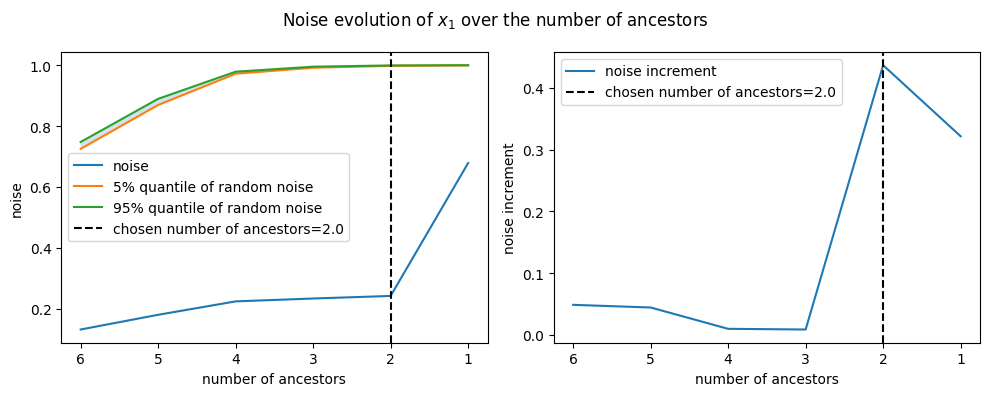

Ancestors of $x_1$: ['$x_2$', '$x_3$']


Results for $w_2$
Kernel [linear] has n/(n+s)=0.998900751878078, Z=(1.00, 1.00), gamma=2.57e+03
Kernel [quadratic] has n/(n+s)=0.9979006816172616, Z=(1.00, 1.00), gamma=3.44e+03
Kernel [gaussian] has n/(n+s)=0.6785866588963998, Z=(0.79, 0.81), gamma=2.27e+00
$w_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.12 after pruning)


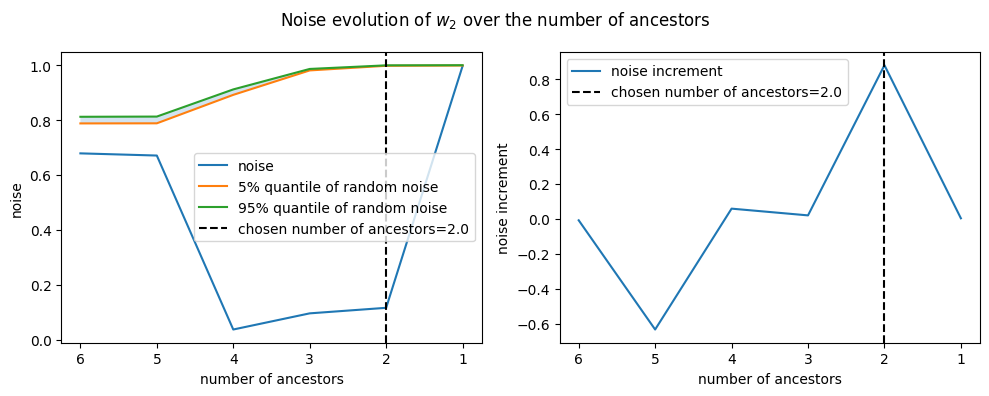

Ancestors of $w_2$: ['$x_1$', '$x_2$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.9996849389442933, Z=(1.00, 1.00), gamma=3.50e+02
Kernel [quadratic] has n/(n+s)=0.9975432973403896, Z=(1.00, 1.00), gamma=4.42e+03
Kernel [gaussian] has n/(n+s)=0.8015102245443331, Z=(0.79, 0.81), gamma=2.36e+00
$w_1$ has no ancestors


Results for $w_4$
Kernel [linear] has n/(n+s)=0.9997495417907004, Z=(1.00, 1.00), gamma=3.81e+03
Kernel [quadratic] has n/(n+s)=0.9978182339075453, Z=(1.00, 1.00), gamma=2.28e+03
Kernel [gaussian] has n/(n+s)=0.8085461038331084, Z=(0.79, 0.82), gamma=2.29e+00
$w_4$ has no ancestors



In [24]:
graph_discovery4.fit()

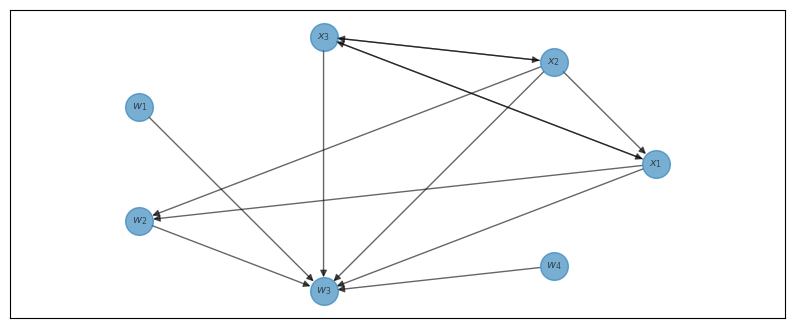

In [25]:
graph_discovery4.plot_graph(type_label=False)

In [26]:
graph_discovery4.show_functional_dependencies()

x_1
 = 1.0 * x_2 {kernel=gaussian, gamma=17.2, noise=0.241}
 + 1.0 * x_3 {kernel=gaussian, gamma=17.2, noise=0.241}
x_2
 = 1.0 * x_3 {kernel=quadratic, gamma=5.96e+05, noise=0.524}
x_3
 = 1.0 * x_1 {kernel=quadratic, gamma=6.34, noise=0.0232}
 + 1.0 * x_2 {kernel=quadratic, gamma=6.34, noise=0.0232}
w_2
 = 1.0 * x_1 {kernel=gaussian, gamma=9.03e-06, noise=0.116}
 + 1.0 * x_2 {kernel=gaussian, gamma=9.03e-06, noise=0.116}
w_3
 = 1.0 * x_1 {kernel=quadratic, gamma=5.45e-05, noise=0.0245}
 + 1.0 * x_2 {kernel=quadratic, gamma=5.45e-05, noise=0.0245}
 + 1.0 * x_3 {kernel=quadratic, gamma=5.45e-05, noise=0.0245}
 + 1.0 * w_1 {kernel=quadratic, gamma=5.45e-05, noise=0.0245}
 + 1.0 * w_2 {kernel=quadratic, gamma=5.45e-05, noise=0.0245}
 + 1.0 * w_4 {kernel=quadratic, gamma=5.45e-05, noise=0.0245}


In [27]:
joblib.dump(graph_discovery4, "example4.pkl")

['example4.pkl']